In [1]:
%run C:/Users/cosmosyw/Documents/Softwares/DNA_MERFISH_analysis/Startup.py
    
import DNA_MERFISH_analysis

PID number is 30064


In [2]:
save_df = False

class_correspondance = {'Gluta':['L2/3 IT', 'L4/5 IT', 'L5 IT', 'L6 IT', 'L5 ET', 'L5/6 NP', 'L6 CT', 'L6b'],
                       'GABA':['Pvalb', 'Sst', 'Sncg', 'Lamp5', 'Vip'], 'Astro':['Astro'], 'Oligo':['Oligo', 'OPC'],
                       'Micro':['Micro'], 'Endo':['Endo-PVM', 'Peri', 'SMC-VLMC']}

if not save_df:
    ######################### if you skip the calculation part below ################################
    df_nucleus_size = pd.read_csv(r'E:\DNA_analysis\Postanalysis_MeCP2\results\nucleus_size\all_size_convex_hull.csv',
                                 index_col=0)
df_nucleus_size

,uid,subclass,MeCP2_genotype,nucleus_volume_all,nucleus_volume_95%pts,total_points,total_chroms,total_fibers,majorType,experiment,hemisphere,WT_over_KO_ratio,region,age
0,100001802425095388929830403384542697355,Endo-PVM,KO,163.048461,115.616720,707,15,16,Endo,809,2,-0.830491,gray_matter,2.5_month
1,100011275211843700317007047959874214901,L2/3 IT,WT,184.491230,149.804210,329,9,9,Gluta,1027,2,-0.576206,gray_matter,6_month
2,100018691111074008062785175114987139925,L4/5 IT,WT,403.279877,332.862582,1888,19,38,Gluta,809,0,0.737448,gray_matter,2.5_month
3,100025410258745869509278857041962001479,L6 CT,KO,290.969813,259.297667,1205,18,26,Gluta,809,2,-0.830491,gray_matter,2.5_month
4,100028637050868960217044968007042339849,L2/3 IT,KO,326.709693,299.365366,1472,19,28,Gluta,724,2,-0.748815,gray_matter,2.5_month
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43740,99948790828831505267962451318236277974,Sst,KO,280.359172,233.133504,1033,16,23,GABA,809,1,0.754569,gray_matter,2.5_month
43741,9996907745959943894951159456871900305,Oligo,KO,54.918612,49.742864,222,4,4,Oligo,724,2,-0.748815,gray_matter,2.5_month
43742,99978497761624731227895039578245755772,Oligo,WT,178.574379,141.381862,990,16,22,Oligo,809,2,-1.124121,white_matter,2.5_month
43743,99984214878467467559577125348897575946,L5 IT,KO,10.352283,8.425812,69,1,1,Gluta,1103,3,-1.151746,gray_matter,6_month


# Plot

In [8]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import plotly.graph_objects as go

mpl.rc('figure', dpi=300)
mpl.rc('figure', titlesize=8.) 
mpl.rc('figure.constrained_layout', use=True)

mpl.rc('axes', labelsize=7.)
mpl.rc('axes', titlesize=8.)
mpl.rc('axes', linewidth=0.5)

mpl.rc('font', family='Arial')

mpl.rc('savefig', dpi=300)
mpl.rc('savefig', format='pdf')

mpl.rc('xtick', labelsize=6.5)
mpl.rc('xtick.major', size=1)
mpl.rc('xtick.major', width=0.5)

mpl.rc('ytick', labelsize=6.5)
mpl.rc('ytick.major', size=1)
mpl.rc('ytick.major', width=0.5)

mpl.rcParams['pdf.fonttype'] = 42

figure_folder = r'E:\DNA_analysis\Postanalysis_MeCP2\results\nucleus_size'

In [4]:
subclasses = []
for _, subcls_list in class_correspondance.items():
    for subcls in subcls_list:
        subclasses.append(subcls)

In [5]:
df_nucleus_size_filtered = df_nucleus_size[(df_nucleus_size['total_points']>=600)].copy()

In [7]:
from scipy.stats import mannwhitneyu
from statsmodels.stats.multitest import multipletests

dict_significance = {}
dict_significance['subclass'] = []
dict_significance['pval'] = []
dict_significance['log2fc'] = []
dict_significance['stats'] = []

for subcls in subclasses:
    df_WT = df_nucleus_size_filtered[(df_nucleus_size_filtered.MeCP2_genotype=='WT')&(df_nucleus_size_filtered.subclass==subcls)].copy()
    df_KO = df_nucleus_size_filtered[(df_nucleus_size_filtered.MeCP2_genotype=='KO')&(df_nucleus_size_filtered.subclass==subcls)].copy()
    
    wt_volumes = df_WT['nucleus_volume_all'].values
    ko_volumes = df_KO['nucleus_volume_all'].values
    
    wt_mean_vol = np.mean(wt_volumes)
    ko_mean_vol = np.mean(ko_volumes)
    
    log2fc = np.log2(ko_mean_vol/wt_mean_vol)
    
    dict_significance['subclass'].append(subcls)
    
    stat, p = mannwhitneyu(wt_volumes, ko_volumes)
    
    dict_significance['pval'].append(p)
    dict_significance['log2fc'].append(log2fc)
    dict_significance['stats'].append(stat)
    
reject, adj_p, _, _ = multipletests(dict_significance['pval'])
dict_significance['adj_p'] = adj_p

df_sig = pd.DataFrame(dict_significance)
df_sig.set_index('subclass', inplace=True)
df_sig

,pval,log2fc,stats,adj_p
subclass,,,,
L2/3 IT,3.129115e-05,-0.077266,745826.0,4.692645e-04
L4/5 IT,1.706744e-01,0.016710,232255.0,6.076936e-01
L5 IT,2.385802e-11,-0.120710,747091.0,4.771605e-10
L6 IT,9.531347e-05,-0.070628,706229.0,1.333562e-03
L5 ET,4.183363e-09,-0.191596,113285.0,7.948389e-08
L5/6 NP,2.326402e-03,-0.133113,55962.0,2.302198e-02
L6 CT,2.294383e-05,-0.056335,3195472.0,3.899735e-04
L6b,1.284020e-03,-0.143193,55031.0,1.529989e-02
Pvalb,4.231890e-02,-0.050501,143961.0,2.285185e-01


meta NOT subset; don't know how to subset; dropped


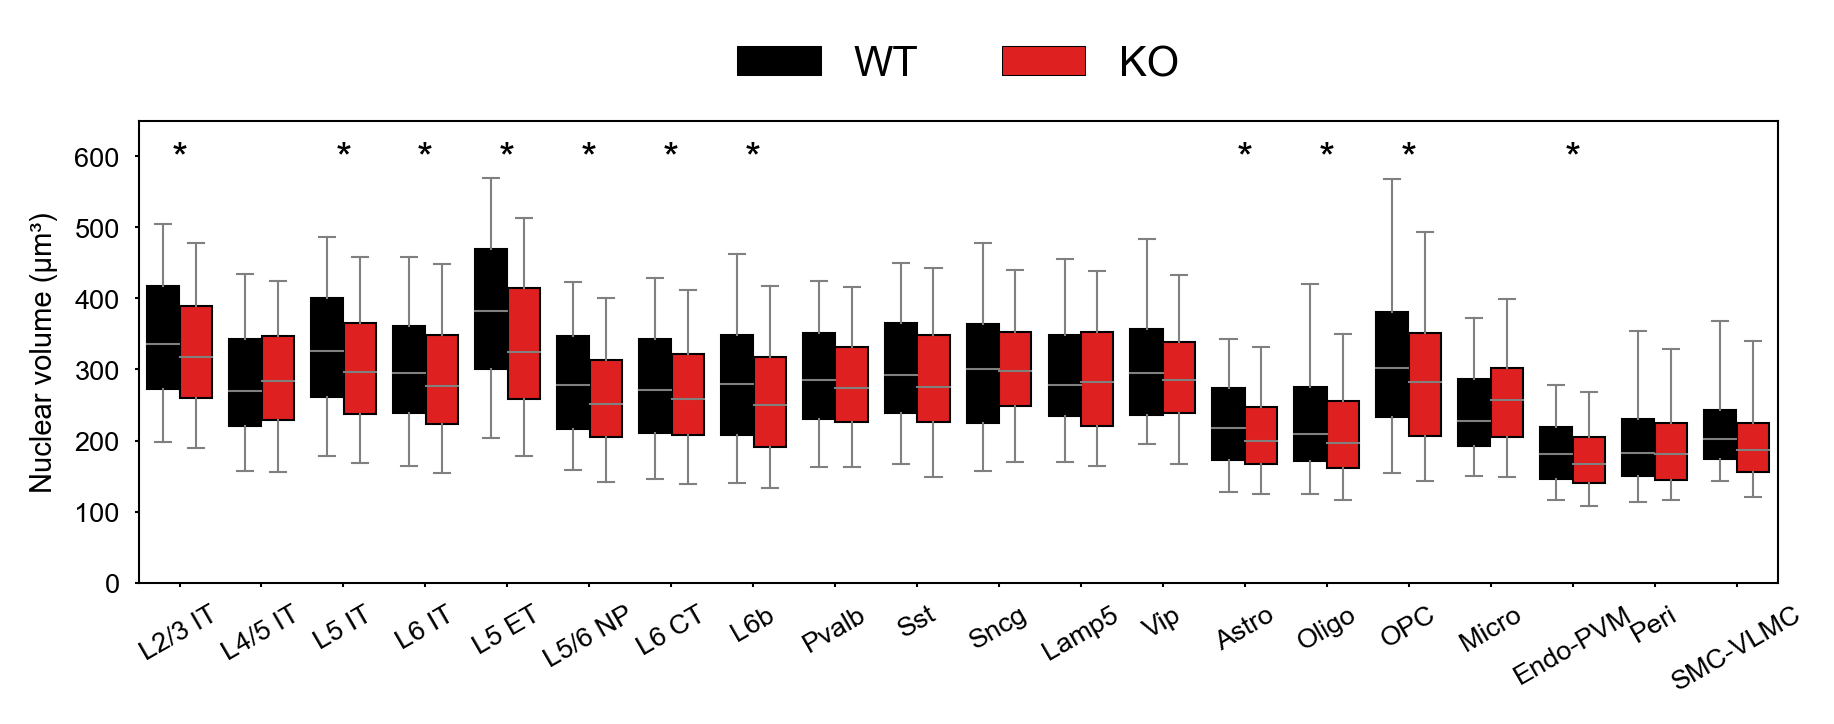

In [9]:
fig = plt.figure(figsize=(6,2.3), dpi=300)

ax = fig.add_subplot(111)

sns.boxplot(data=df_nucleus_size_filtered, x='subclass', y='nucleus_volume_all', hue='MeCP2_genotype', order=subclasses, 
            hue_order=['WT','KO'], palette={'WT':'black', 'KO':'red'}, ax=ax, fliersize=0, linewidth=0.5, whis=[5,95])
sns.move_legend(
    ax, "lower center",
    bbox_to_anchor=(.5, 1), ncol=2, title=None, frameon=False,
)

ax.set_ylabel('Nuclear volume (µm³)', fontsize=7)
ax.set_xlabel(None)
ax.set_ylim(0,650)
ax.tick_params(axis='x', rotation=30)
lines = [line for line in ax.get_lines()]
for i, line in enumerate(lines):
    line.set_color('gray')

for i, subcls in enumerate(subclasses):
    if df_sig.loc[subcls,'adj_p']<=0.05:
        ax.text(i-0.1,580,'*', fontsize=10)

plt.savefig('Nuclear_volume_600pts.pdf')
        
plt.show()